In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

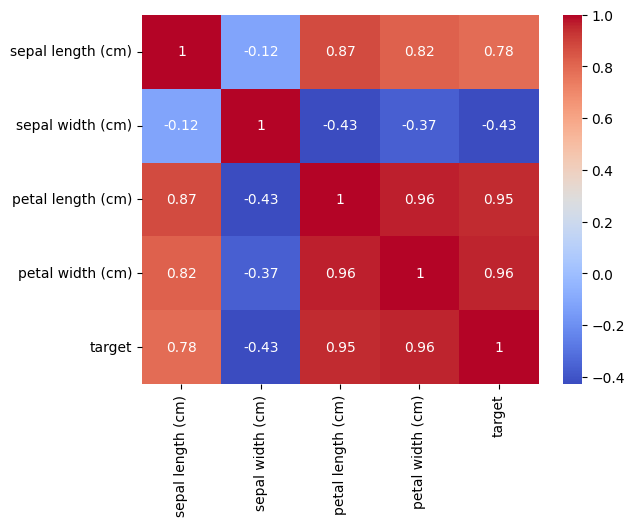

In [7]:
new_data=data.select_dtypes(include=['number'])
sns.heatmap(new_data.corr(), annot=True, cmap='coolwarm')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [10]:
y_pred = model.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [17]:
TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]
print("TN: ",TN)
print("FN: ",FN)
print("FP: ",FP)
print("TP: ",TP)

TN:  9
FN:  0
FP:  0
TP:  10


In [15]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

# Compute error rate
error_rate = (FP + FN) / (TP + TN + FP + FN)
print("Error Rate:", error_rate)

# Compute precision
precision = TP / (TP + FP)
print("Precision:", precision)

# Compute recall
recall = TP / (TP + FN)
print("Recall:", recall)

Accuracy: [1. 1. 1.]
Error Rate: [0. 0. 0.]
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]


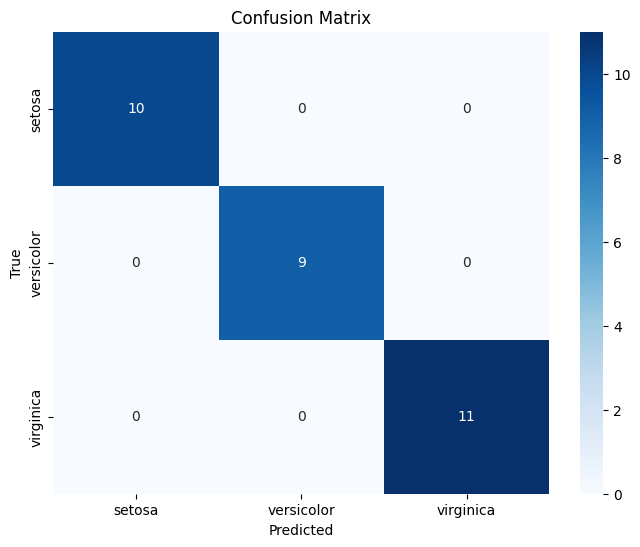

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

